# 機器學習 作業2

### 作業繳交注意事項

1. 程式格(Cell)中印出的內容皆須留在上傳的ipynb檔案中，且檔案在路徑正確指向train/test資料夾時須能從頭執行到尾
2. 上傳檔名格式為[學號-姓名] (例：m11199987-王大明.ipynb)，檔名格式錯誤扣10分
3. 程式碼易讀性、資料處理完整度和結果準確率將作為評分項目

In [42]:
# 使用colab讀取Google雲端硬碟內的檔案
from google.colab import drive # import Google雲端硬碟套件
drive.mount('/content/gdrive') # 將自己的雲端硬碟掛載上去
# 透過 gdrive/My Drive/... 來存取檔案

#修改為你檔案放的路徑，gdrive/My Drive/指向雲端硬碟的根目錄，例：
# train = pd.read_csv('gdrive/My Drive/HW1/Steel Plates Faults(classification)/train.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.python import keras
from keras.layers import Input,  SimpleRNN, RNN, LSTM
from keras.models import Model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## 任務1. 影像分類

### 資料描述
資料集中包含6種表面瑕疵的影像檔案，分別為rolled-in scale(RS)、patches(Pa)、crazing(Cr)、pitted surface(PS)、inclusion(In)和scratches (Sc)等六種類別。

### 目標
1. 請從train資料夾內讀取影像，建立影像分類模型，並對test資料夾內的影像進行類別預測
2. 將程式碼依照其功能放置於「讀取資料」、「資料前處理」、「建立訓練模型」和「測試資料集上預測」儲存格內
3. 在程式碼尾端使用print()印出測試結果準確率

##### 來源
*http://faculty.neu.edu.cn/songkc/en/zdylm/263265/list/index.htm*

### 程式碼

In [44]:
# ---------------- 讀取資料 -------------------

folder_path_q1train = 'gdrive/My Drive/fourth/ML/NEU Surface Defect Database(image)/train'
subfolders_q1train = [f.name for f in os.scandir(folder_path_q1train) if f.is_dir()]

listOfTrain_q1 = list()

# 讀取子檔案並表示類別
for subfolder in subfolders_q1train:
    bmp_files = [f for f in os.listdir(folder_path_q1train + '/' + subfolder) if f.endswith('.bmp')]
    for bmp_file in bmp_files:
        image = Image.open(folder_path_q1train + '/' + subfolder + "/" + bmp_file)
        image_data = list(image.getdata())
        image_data.append(subfolder)
        listOfTrain_q1.append(image_data)


Cr_168.bmp
Cr_142.bmp
Cr_156.bmp
Cr_174.bmp
Cr_143.bmp
Cr_116.bmp
Cr_126.bmp
Cr_164.bmp
Cr_112.bmp
Cr_139.bmp
Cr_130.bmp
Cr_127.bmp
Cr_157.bmp
Cr_152.bmp
Cr_17.bmp
Cr_137.bmp
Cr_114.bmp
Cr_133.bmp
Cr_16.bmp
Cr_154.bmp
Cr_144.bmp
Cr_177.bmp
Cr_146.bmp
Cr_102.bmp
Cr_162.bmp
Cr_107.bmp
Cr_134.bmp
Cr_128.bmp
Cr_172.bmp
Cr_158.bmp
Cr_167.bmp
Cr_169.bmp
Cr_113.bmp
Cr_105.bmp
Cr_104.bmp
Cr_120.bmp
Cr_166.bmp
Cr_103.bmp
Cr_173.bmp
Cr_122.bmp
Cr_165.bmp
Cr_155.bmp
Cr_153.bmp
Cr_118.bmp
Cr_160.bmp
Cr_175.bmp
Cr_117.bmp
Cr_148.bmp
Cr_176.bmp
Cr_109.bmp
Cr_163.bmp
Cr_138.bmp
Cr_115.bmp
Cr_125.bmp
Cr_101.bmp
Cr_140.bmp
Cr_170.bmp
Cr_111.bmp
Cr_161.bmp
Cr_129.bmp
Cr_124.bmp
Cr_100.bmp
Cr_10.bmp
Cr_150.bmp
Cr_13.bmp
Cr_131.bmp
Cr_149.bmp
Cr_141.bmp
Cr_1.bmp
Cr_106.bmp
Cr_136.bmp
Cr_108.bmp
Cr_151.bmp
Cr_14.bmp
Cr_121.bmp
Cr_159.bmp
Cr_110.bmp
Cr_11.bmp
Cr_12.bmp
Cr_119.bmp
Cr_24.bmp
Cr_209.bmp
Cr_238.bmp
Cr_267.bmp
Cr_204.bmp
Cr_219.bmp
Cr_214.bmp
Cr_220.bmp
Cr_248.bmp
Cr_217.bmp
Cr_193.bmp
Cr_249.bm

In [45]:
# 處理X_test
folder_path_q1test = 'gdrive/My Drive/fourth/ML/NEU Surface Defect Database(image)/test'
subfolders_q1test = [f.name for f in os.scandir(folder_path_q1test) if f.is_dir()]

listOfTest_q1 = list()

for subfolder in subfolders_q1test:

    bmp_files = [f for f in os.listdir(folder_path_q1test + '/' + subfolder) if f.endswith('.bmp')]
    for bmp_file in bmp_files:
        image = Image.open(folder_path_q1test + '/' + subfolder + "/" + bmp_file)
        image_data = list(image.getdata())
        image_data.append(subfolder)
        listOfTest_q1.append(image_data)

In [46]:
listOfTrain_q1 = pd.DataFrame(listOfTrain_q1)
listOfTest_q1 = pd.DataFrame(listOfTest_q1)

In [47]:
# ---------------- 資料前處理 -------------------
# normalize data
y_train, y_test = listOfTrain_q1[40000], listOfTest_q1[40000]
x_train_norm = listOfTrain_q1.drop([40000], axis=1)
x_test_norm = listOfTest_q1.drop([40000], axis=1)
x_train_norm, x_test_norm = np.array(x_train_norm), np.array(x_test_norm)
x_train = x_train_norm.reshape(-1,200,200,1).astype('float32')/255
x_test = x_test_norm.reshape(-1,200,200,1).astype('float32')/255

In [62]:
train_data,val_data,train_label,val_label=train_test_split(x_train,y_train,test_size=0.2,random_state=13)

In [48]:
# 處理label
y = pd.concat([y_train, y_test])
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y_train = y[0:1620]
y_test = y[1620:]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [50]:
# ---------------- 建立訓練模型 -------------------
# 圖像資料預測分類，使用CNN

# 處理圖形，使用ImageDataGneator
train_datagen = ImageDataGenerator(rotation_range=40 ,
                             width_shift_range=0.2 ,
                             height_shift_range=0.2 ,
                             shear_range=0.2 ,
                             zoom_range=0.2 ,
                             horizontal_flip = True,
                             data_format='channels_last')

train_datagen.fit(x_train)

In [51]:
model_cnn = tf.keras.Sequential([
    tf.keras.Input(shape=(200,200,1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax"),
])

In [52]:
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:

#fit data, using fit_generator來處理圖形相關的fit
history = model_cnn.fit_generator(train_datagen.flow(train_data,train_label,batch_size=64), epochs=5, validation_data = (val_data, val_label))

<ipython-input-63-94700df65ecc>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_cnn.fit_generator(train_datagen.flow(train_data,train_label,batch_size=64), epochs=5, validation_data = (val_data, val_label))


Epoch 1/5
21/21 [==============================] - 119s 6s/step - loss: 0.3021 - accuracy: 0.8981 - val_loss: 0.7127 - val_accuracy: 0.7654
Epoch 2/5
21/21 [==============================] - 116s 6s/step - loss: 0.2944 - accuracy: 0.8997 - val_loss: 1.4010 - val_accuracy: 0.6698
Epoch 3/5
21/21 [==============================] - 117s 5s/step - loss: 0.3003 - accuracy: 0.8935 - val_loss: 0.3700 - val_accuracy: 0.8580
Epoch 4/5
21/21 [==============================] - 119s 6s/step - loss: 0.2964 - accuracy: 0.8935 - val_loss: 0.7192 - val_accuracy: 0.7315
Epoch 5/5
21/21 [==============================] - 117s 6s/step - loss: 0.3267 - accuracy: 0.8819 - val_loss: 0.8225 - val_accuracy: 0.7932


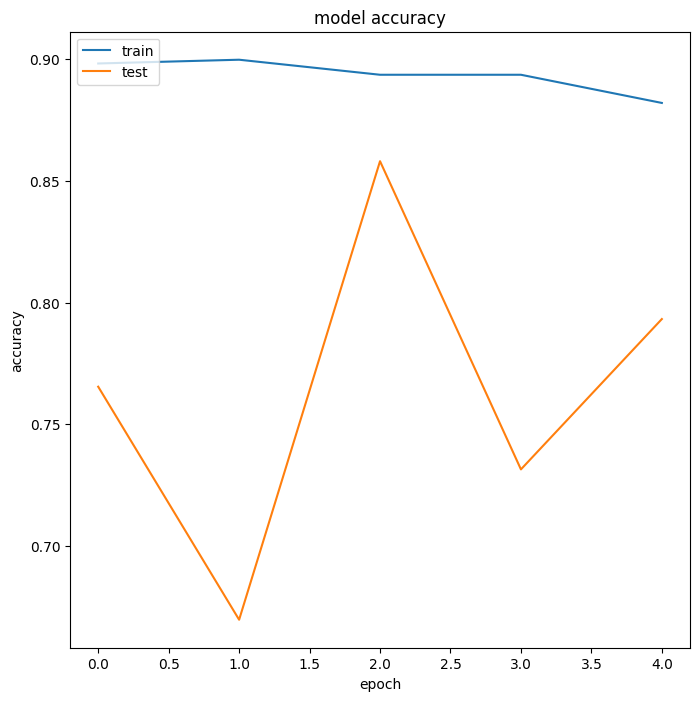

In [64]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
# ---------------- 在測試資料集上預測 -------------------
loss,acc=model_cnn.evaluate(x_test,y_test)

6/6 [==============================] - 3s 509ms/step - loss: 0.7925 - accuracy: 0.8056


In [66]:
# ---------------- 印出測試結果準確率 -------------------
print(f'The Accuracy on Test Data = {acc}')

The Accuracy on Test Data = 0.8055555820465088


## 任務2 時序資料建模

### 資料描述
檔案中包含城市中每小時的環境資訊和共享單車的租借量

### Target
1. 請從train.csv檔案中讀取訓練集資料進行時序模型建模，並對test.csv內的每筆資料進迴歸預測目標Y_count，時間步長度可自訂，但只能選擇使用該Y_count時間步以前的資料作為輸入預測
2. 將程式碼依照其功能放置於「讀取資料」、「資料前處理」、「建立訓練模型」和「測試資料集上預測」儲存格內
3. 在程式碼尾端使用print()印出測試結果的MSE

##### 來源
*https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset*

### 程式碼

In [67]:
# ---------------- 讀取資料 -------------------
train_q2 = pd.read_csv('gdrive/My Drive/fourth/ML/Bike sharing demand(temporal)/train.csv')
test_q2 = pd.read_csv('gdrive/My Drive/fourth/ML/Bike sharing demand(temporal)/test.csv')

In [68]:
# ---------------- 資料前處理(此段程式請加註解，並簡短敘述你選擇的時間步長，以及為什麼)-------------------
# 先將小時分隔開來，看有沒有缺失值
train_q2['hour'] = train_q2['datetime'].str.split(' ').str[1].str.split(':').str[0].astype(int)
test_q2['hour'] = test_q2['datetime'].str.split(' ').str[1].str.split(':').str[0].astype(int)

In [69]:
# 將缺失的值補0
time = 0
i = 0
X_df = []

while i < 9975:
    if train_q2['hour'][i] == time:
        X_df.append(train_q2.loc[i].values)
        i += 1
        time += 1
    else:
        X_df.append([0 for zero in range(11)])
        time += 1
    if time == 24:
        time = 0


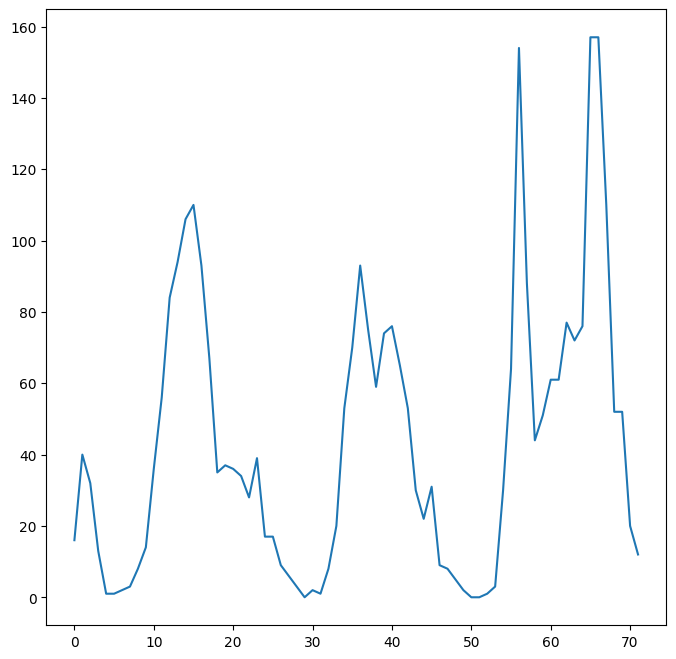

In [70]:
# 觀察循環，可以看出循環大概為6一循環
X_df = pd.DataFrame(X_df)
plt.plot(X_df[9][0:72])

In [71]:
# reshape成包含timestep的三維陣列
X_df = pd.DataFrame(X_df)
y_df = X_df[9]
X_df = X_df.drop([0,9,10], axis=1)
X_df = np.array(X_df)
X_df_reshape = X_df.reshape(1672,6,8)

In [72]:
# 處理test
X_df_test = []
time = 0
i = 0

while i < 911:
    if test_q2['hour'][i] == time:
        X_df_test.append(test_q2.loc[i].values)
        i += 1
        time += 1
    else:
        X_df_test.append([0 for zero in range(11)])
        time += 1
    if time == 24:
        time = 0
X_df_test = pd.DataFrame(X_df_test)
y_df_test = X_df_test[9]
X_df_test = X_df_test.drop([0,9,10], axis=1)
X_df_test = np.array(X_df_test)
X_df_test_reshape = X_df_test.reshape(152,6,8)

In [73]:
# ---------------- 建立訓練模型 -------------------
# 含有時間序列特性，選擇LSTM作為模型
def build_model():
    model = Sequential()
    model.add(LSTM(4, return_sequences=False, input_shape=(X_df_reshape.shape[1], X_df_reshape.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

def train_model(X_train, y_train, X_test):
    model = build_model()
    model.fit(X_train, y_train, batch_size = 128, epochs = 30, validation_split = 0.1)
    predict = model.predict(X_test)
    return predict, model

In [74]:
y_train = np.array(y_df)
y_train = y_train.reshape(1672, 6)
y_test = np.array(y_df_test)
y_test = y_test.reshape(152, 6)

In [75]:
X_train = X_df_reshape
X_test = X_df_test_reshape
y_pred, model = train_model(X_train, y_train , X_test)

Epoch 1/30
12/12 [==============================] - 3s 59ms/step - loss: 59865.1211 - mse: 59865.1211 - val_loss: 138103.2188 - val_mse: 138103.2188
Epoch 2/30
12/12 [==============================] - 0s 13ms/step - loss: 59679.8125 - mse: 59679.8125 - val_loss: 137640.5312 - val_mse: 137640.5312
Epoch 3/30
12/12 [==============================] - 0s 13ms/step - loss: 59235.9453 - mse: 59235.9453 - val_loss: 136587.2969 - val_mse: 136587.2969
Epoch 4/30
12/12 [==============================] - 0s 12ms/step - loss: 58310.2930 - mse: 58310.2930 - val_loss: 134482.0312 - val_mse: 134482.0312
Epoch 5/30
12/12 [==============================] - 0s 19ms/step - loss: 56545.0625 - mse: 56545.0625 - val_loss: 130581.4062 - val_mse: 130581.4062
Epoch 6/30
12/12 [==============================] - 0s 18ms/step - loss: 53350.9141 - mse: 53350.9141 - val_loss: 123315.8594 - val_mse: 123315.8594
Epoch 7/30
12/12 [==============================] - 0s 18ms/step - loss: 47507.3398 - mse: 47507.3398 - va

In [76]:
# ---------------- 在測試資料集上預測 -------------------
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [77]:
# ---------------- 印出測試結果MSE -------------------
print('測試結果MSE: ', mean_squared_error(y_test, y_pred))

測試結果MSE:  38720.143169152136
